In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
# Функция для отображения изображений
def show_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

In [4]:
# Гиперпараметры
batch_size = 64
learning_rate = 0.01
num_epochs = 5

In [5]:
# Загрузка и предобработка датасета MNIST
dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

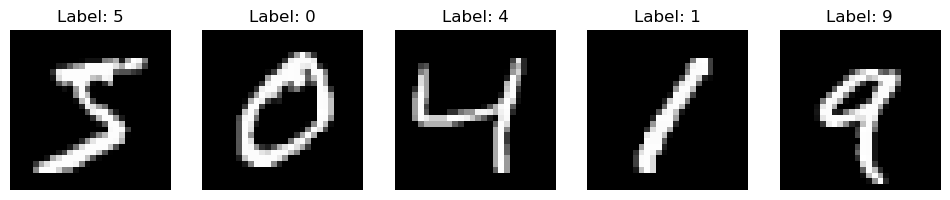

In [6]:
# Извлечение нескольких изображений и их меток
num_images_to_show = 5
images_to_show = []
labels_to_show = []

for i in range(num_images_to_show):
    image, label = dataset[i]
    images_to_show.append(image)
    labels_to_show.append(label)

# Вывод изображений и их меток
show_images(images_to_show, labels_to_show)

In [7]:
# Загрузка и предобработка датасета MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# Определение однослойного перцептрона
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SingleLayerPerceptron, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.fc(x)
        return out

In [19]:
hidden_size = 128
# Определение модели
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [20]:
# Инициализация модели, функции потерь и оптимизатора
model = MLP(input_size, hidden_size, num_classes)

In [11]:
# Параметры модели
input_size = 28 * 28  # Размер изображений 28x28
num_classes = 10  # Цифры от 0 до 9

In [12]:
model = SingleLayerPerceptron(input_size, num_classes)

In [21]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# Обучение модели
for epoch in range(num_epochs):
    for images, labels in tqdm(train_loader):
        # Преобразование изображений в вектор
        images = images.view(-1, input_size)

        # Прямой проход
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

100%|████████████████████████████████████████| 938/938 [00:01<00:00, 488.84it/s]


Epoch [1/5], Loss: 0.4341


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 508.22it/s]


Epoch [2/5], Loss: 0.4649


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 508.45it/s]


Epoch [3/5], Loss: 0.3619


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 493.24it/s]


Epoch [4/5], Loss: 0.2581


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 495.17it/s]

Epoch [5/5], Loss: 0.3407


In [23]:
# Тестирование модели
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {(100 * correct / total):.2f}%')
    
    for images, labels in train_loader:
        images = images.view(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Train Accuracy: {(100 * correct / total):.2f}%')

# Сохранение модели
torch.save(model.state_dict(), 'slp_model.pth')

Test Accuracy: 91.62%
Train Accuracy: 91.09%
